# Best Practices for Preprocessing Natural Language Data

In this notebook, we improve the quality of our Project Gutenberg word vectors by adopting best-practices for preprocessing natural language data.

**N.B.:** Some, all or none of these preprocessing steps may be helpful to a given downstream application. 

#### Load dependencies

In [4]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\009\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# new!
import string
# addressing the Stopwords
from nltk.corpus import stopwords
# Stemming tools
from nltk.stem.porter import *
# Bigrams tools
from gensim.models.phrases import Phraser, Phrases
# One hot encoding
from keras.preprocessing.text import one_hot

Using TensorFlow backend.


In [10]:
#Loading the stopwords dictionnary
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\009\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Load data

In [11]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\009\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [12]:
from nltk.corpus import gutenberg

In [13]:
# the sentences tokinizer instance
gberg_sents = gutenberg.sents()

#### Iteratively preprocess a sentence

##### a tokenized sentence: 

In [14]:
# Sentnece= List of words
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

##### to lowercase: 

In [16]:
# Words with Lower or Upper case are typically indentical in meaning
# iterating
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

##### remove stopwords and punctuation: 

In [17]:
# the removal deppends on the needs, the size of corpus, the goals, ......
stpwrds_and_punctuation = stopwords.words('english') + list(string.punctuation)

In [18]:
stpwrds_and_punctuation

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
[w.lower() for w in gberg_sents[4] if w not in stpwrds_and_punctuation]

['she',
 'youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

##### stem words: 

In [21]:
# truncat to the meaninufull part
# PorterStemmer is popular stemmer
#In case of larger corpus you may want to avoid stemming in order to keep the variations
stemmer = PorterStemmer()

In [22]:
[stemmer.stem(w.lower()) for w in gberg_sents[4] if w not in stpwrds_and_punctuation]

['she',
 'youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

##### handle bigram collocations:

In [23]:
#biagrams= words occuring to much to guether=> one concept, ex: New York, Thank YOu
phrases = Phrases(gberg_sents) # train detector

In [24]:
bigram = Phraser(phrases) # create a more efficient Phraser object for transforming sentences

In [25]:
bigram.phrasegrams # output count and score of each bigram (ocuurence of togetherness and  score= "togetherness/a part" in the whole corpus)

{(b'la', b'!'): (7, 14.377704155768672),
 (b'fourth', b'year'): (13, 70.99107475964988),
 (b'short', b'pause'): (11, 86.61965123608095),
 (b'themselves', b'together'): (44, 32.443044734519944),
 (b'Dough', b'-'): (16, 48.041179378531076),
 (b'-', b'mast'): (30, 12.845235127949485),
 (b'am', b'persuaded'): (12, 14.509626277861573),
 (b'Wee', b"'"): (19, 18.940835962214123),
 (b"'", b'gainst'): (8, 11.668907869578344),
 (b'laid', b'wait'): (9, 23.354708359296815),
 (b'lodged', b'there'): (10, 14.090248348143085),
 (b'pivot', b'-'): (7, 19.965165456012915),
 (b'Guernsey', b'-'): (11, 34.9390395480226),
 (b'didn', b"'"): (160, 30.144678663077386),
 (b'most', b'amiable'): (8, 17.207358697063572),
 (b'over', b'against'): (103, 10.771922203608993),
 (b'spread', b'abroad'): (14, 194.30906996229578),
 (b'Project', b'Gutenberg'): (20, 17839.067307692305),
 (b'Colonel', b'Wallis'): (23, 967.3744677153037),
 (b'molten', b'images'): (10, 966.2828125000001),
 (b'sojourneth', b'among'): (8, 92.577994

In [26]:
#Example of applcation of bigrams
"Jon lives in New York City".split()

['Jon', 'lives', 'in', 'New', 'York', 'City']

In [27]:
bigram["Jon lives in New York City".split()]
# New, York = New_York 
# Trigram are to explore (New York City)

['Jon', 'lives', 'in', 'New_York', 'City']

#### Preprocess the corpus

In [29]:
#Creat list of all lower case sentneces, including the Stopwords: for training purposes some Stopwords might be paired with meaninful ones
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w not in list(string.punctuation)])

In [30]:
lower_sents[0:5]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period']]

In [31]:
lower_bigram = Phraser(Phrases(lower_sents))

In [32]:
lower_bigram.phrasegrams # (b'miss', b'fairfax') (b'any', b'thing') (b'laugh', b'at')

{(b'fourth', b'year'): (13, 61.9554816),
 (b'short', b'pause'): (11, 83.26155963302752),
 (b'themselves', b'together'): (44, 31.46210359577169),
 (b'am', b'persuaded'): (12, 13.9008842237933),
 (b'zedekiah', b'king'): (15, 30.98956145832266),
 (b'king', b'post'): (10, 10.21996175753194),
 (b'laid', b'wait'): (9, 21.714408764232456),
 (b'appear', b'd'): (16, 11.653197226502312),
 (b'most', b'amiable'): (9, 20.908663648615956),
 (b'over', b'against'): (106, 10.306348762219812),
 (b'miss', b'fairfax'): (125, 253.16112835175565),
 (b'saffron', b'park'): (9, 2168.5806451612902),
 (b'sojourneth', b'among'): (8, 86.1258362989324),
 (b'any', b'thing'): (384, 34.60353767883287),
 (b'broken', b'glass'): (10, 42.57025456285268),
 (b'laugh', b'at'): (34, 10.684790511927686),
 (b'at', b'length'): (101, 22.85664635341284),
 (b'tell', b'vs'): (9, 11.407556846034918),
 (b'good', b'breeding'): (8, 36.8301848507599),
 (b'walking', b'stick'): (10, 115.37643020594965),
 (b'five', b'rams'): (12, 94.6696917

In [35]:
#Quick Test
lower_bigram["jon lives in new york city".split()]

['jon', 'lives', 'in', 'new', 'york', 'city']

In [36]:
#Upping the Threashold for Occurence=32, SCore=64, we will get more clear pairs
lower_bigram = Phraser(Phrases(lower_sents, min_count=32, threshold=64))
lower_bigram.phrasegrams

{(b'afar', b'off'): (52, 108.14220347465505),
 (b'burnt', b'offering'): (184, 297.524653753951),
 (b'burnt', b'offerings'): (86, 299.15702343127646),
 (b'buster', b'bear'): (142, 479.87410772225826),
 (b'captain', b'benwick'): (56, 241.49037086312987),
 (b'captain', b'wentworth'): (196, 529.8756608388247),
 (b'charles', b'hayter'): (33, 92.03437785214481),
 (b'chief', b'priests'): (65, 116.31947753846512),
 (b'colonel', b'brandon'): (132, 1313.0078125),
 (b'couldn', b't'): (89, 171.76138536935215),
 (b'cut', b'off'): (217, 129.60290535032792),
 (b'dare', b'say'): (115, 89.94000515807346),
 (b'de', b'grey'): (77, 603.2109624246722),
 (b'didn', b't'): (180, 220.51081560283686),
 (b'doesn', b't'): (53, 106.2634985949418),
 (b'don', b't'): (830, 250.30957446808512),
 (b'dr', b'bull'): (65, 680.7870294599019),
 (b'dr', b'middleton'): (40, 162.73103819257668),
 (b'drawing', b'room'): (49, 84.91494947493561),
 (b'farmer', b'brown'): (100, 386.05179596892236),
 (b'father', b'brown'): (207, 91.

In [37]:
# as in Maas et al. (2001):
# - leave in stop words ("indicative of sentiment")
# - no stemming ("model learns similar representations of words of the same stem when data suggests it")
#for each sentence we append after passing it through the filter
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

In [38]:
clean_sents[0:9]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an',
 

In [39]:
clean_sents[6] # could consider removing stop words or common words

['sixteen',
 'years',
 'had',
 'miss_taylor',
 'been',
 'in',
 'mr_woodhouse',
 's',
 'family',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 'very',
 'fond',
 'of',
 'both',
 'daughters',
 'but',
 'particularly',
 'of',
 'emma']

#### Run word2vec

In [40]:
# max_vocab_size can be used instead of min_count (which has increased here)
#3 min runtime with 4GB ram and core i5
model = Word2Vec(sentences=clean_sents, size=64, sg=1, window=10, min_count=10, seed=42, workers=8)
model.save('clean_gutenberg_model.w2v')

#### Explore model

In [41]:
# skip re-training the model with the next line:  
model = gensim.models.Word2Vec.load('clean_gutenberg_model.w2v')

In [42]:
len(model.wv.vocab) # down from 17k in previous notebook

10329

In [44]:
# new word from the bioagram "ma_am"
model['ma_am']

array([ 0.3766728 ,  0.25876319, -0.5080471 ,  0.28249156,  0.23865087,
        0.14390723,  0.44638735, -0.38710511,  0.08591636, -0.4380151 ,
       -0.34897214, -0.00249946, -0.34433517, -0.27894989, -0.04447649,
        0.09560811,  0.31241906, -0.32027555,  0.27962631, -0.4075135 ,
       -0.18637814, -0.39342263, -0.23533073, -0.12845472, -0.11570611,
       -0.51977575, -0.55927455, -0.21281895,  0.14258136,  0.06874955,
       -0.43849438,  0.44356996, -0.49349496,  0.14603022,  0.24101605,
       -0.09670868,  0.11244334, -0.10839415,  0.06011881,  0.0663384 ,
        0.25652117,  0.12797897, -0.0923718 ,  0.00310699,  0.22638071,
       -0.73350906, -0.55577111,  0.266978  , -0.29816863,  0.25034562,
        0.40704545, -0.28457001,  0.30009076,  0.02513353,  0.21761766,
        1.14099336, -0.23552875,  0.34190479, -0.15770121, -0.03580849,
       -0.42009705, -0.18253484, -0.4941777 ,  0.19476052], dtype=float32)

In [45]:
model.most_similar('ma_am') 

[('betty', 0.8653212785720825),
 ('madam', 0.8392884731292725),
 ('m_sure', 0.8314577341079712),
 ('nancy', 0.8245792984962463),
 ('goose', 0.8226374387741089),
 ('shouldn', 0.8219201564788818),
 ('mamma', 0.816972017288208),
 ('sir', 0.8163734674453735),
 ('madman', 0.8141891956329346),
 (";'", 0.8134243488311768)]

In [46]:
# swap woman and man, expecting "sir", 
model.most_similar(positive=['ma_am', 'man'], negative=['woman']) 

[('dr', 0.7182788848876953),
 ('sergeant', 0.7124853730201721),
 ('hutton', 0.7111455202102661),
 ('policeman', 0.702538251876831),
 ('wilkinson', 0.6966596245765686),
 ('anyhow', 0.6954399347305298),
 ('hirsch', 0.6933173537254333),
 ('professor', 0.6880460381507874),
 ('jolly', 0.6866101622581482),
 ('bullet', 0.6860513091087341)]

In [47]:
model.most_similar(positive=['father', 'woman'], negative=['man']) 

[('sister', 0.7776371240615845),
 ('mother', 0.7605657577514648),
 ('husband', 0.7577716112136841),
 ('daughter', 0.7470927238464355),
 ('wife', 0.7349058985710144),
 ('sarah', 0.7004030346870422),
 ('jacob', 0.691778838634491),
 ('rebekah', 0.6848896741867065),
 ('daughters', 0.6780199408531189),
 ('brother', 0.6771359443664551)]

#### Reduce word vector dimensionality with t-SNE

In [48]:
tsne = TSNE(n_components=2, n_iter=1000)

In [49]:
X_2d = tsne.fit_transform(model[model.wv.vocab])

In [50]:
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [51]:
coords_df.head()

,x,y,token
0,-13.057447,-48.458469,bracelets
1,-34.306622,15.693257,speak
2,0.094606,37.087463,considerate
3,28.234352,34.120564,amendment
4,4.219818,1.695316,vice


In [52]:
coords_df.to_csv('clean_gutenberg_tsne.csv', index=False)

#### Visualise 

In [53]:
coords_df = pd.read_csv('clean_gutenberg_tsne.csv')

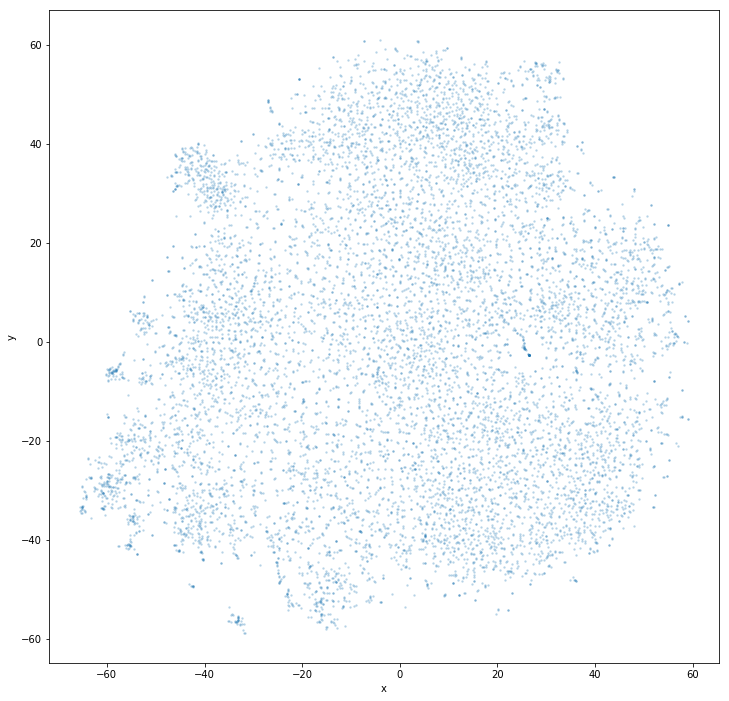

In [54]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

In [55]:
output_notebook()

Loading BokehJS ...

In [59]:
subset_df = coords_df.sample(n=1000)

In [60]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [61]:
show(p)

In [64]:
output_file("W2V", title="W2V") 